## License

Copyright 2021-2025 Patrick Hall (jphall@gwu.edu)

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

*DISCLAIMER*: This notebook is not legal or compliance advice.

# Assignment 1 Template

#### Imports and inits

In [2]:
# Install necessary packages
!pip install -q interpret h2o xgboost pandas numpy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 82.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 195.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228

In [3]:
!pip install numpy==1.24.4 --no-cache-dir
!pip install --upgrade --force-reinstall pandas xgboost h2o interpret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 193.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
interpret-core 0.6.10 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
  Using cached h2o-3.46.0.6-py2.py3-none-any.whl
  Using cached interpret-0.6.10-py3-none-any.whl.metadata (1.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
^C


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import itertools

# H2O
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

# InterpretML
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.perf import ROC

# XGBoost
import xgboost as xgb

# Set random seed and threads
SEED = 12345
NTHREAD = 4

In [2]:
# Step 2: Initialize H2O
h2o.init(max_mem_size='6G', nthreads=NTHREAD)
h2o.remove_all()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9wa7_xsh
  JVM stdout: /tmp/tmp9wa7_xsh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9wa7_xsh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_ax6u2g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


#### Import data

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
# may need to be updated to location on your drive
%cd /content/drive/MyDrive/DNSC_6330_Software/Lecture_01/
%ls

Mounted at /content/drive/
/content/drive/MyDrive/DNSC_6330_Software/Lecture_01
 01_Explainable_AI_Models.ipynb     ph_best_ebm_2025_03_26_06_47_40.csv
 assign_1_template.ipynb            ph_best_glm_2025_03_26_05_03_32.csv
'Copy of assign_1_template.ipynb'   ph_best_mxgb_2025_03_26_05_18_41.csv
 hmda_test_preprocessed.csv         yourname_ebm.csv
 hmda_train_preprocessed.csv        yourname_glm.csv
 mli-resources/                     yourname_xgb.csv


In [4]:
train = pd.read_csv('../Lecture_01/hmda_train_preprocessed.csv')
test = pd.read_csv('../Lecture_01/hmda_test_preprocessed.csv')

#### Assign basic modeling roles

In [5]:
# Step 4: Define Target and Features
y_name = 'high_priced'
x_names = [
    'conforming', 'debt_to_income_ratio_std', 'debt_to_income_ratio_missing',
    'income_std', 'loan_amount_std', 'intro_rate_period_std',
    'loan_to_value_ratio_std', 'no_intro_rate_period_std',
    'property_value_std', 'term_360'
]

## Basic data exploration

#### Histograms

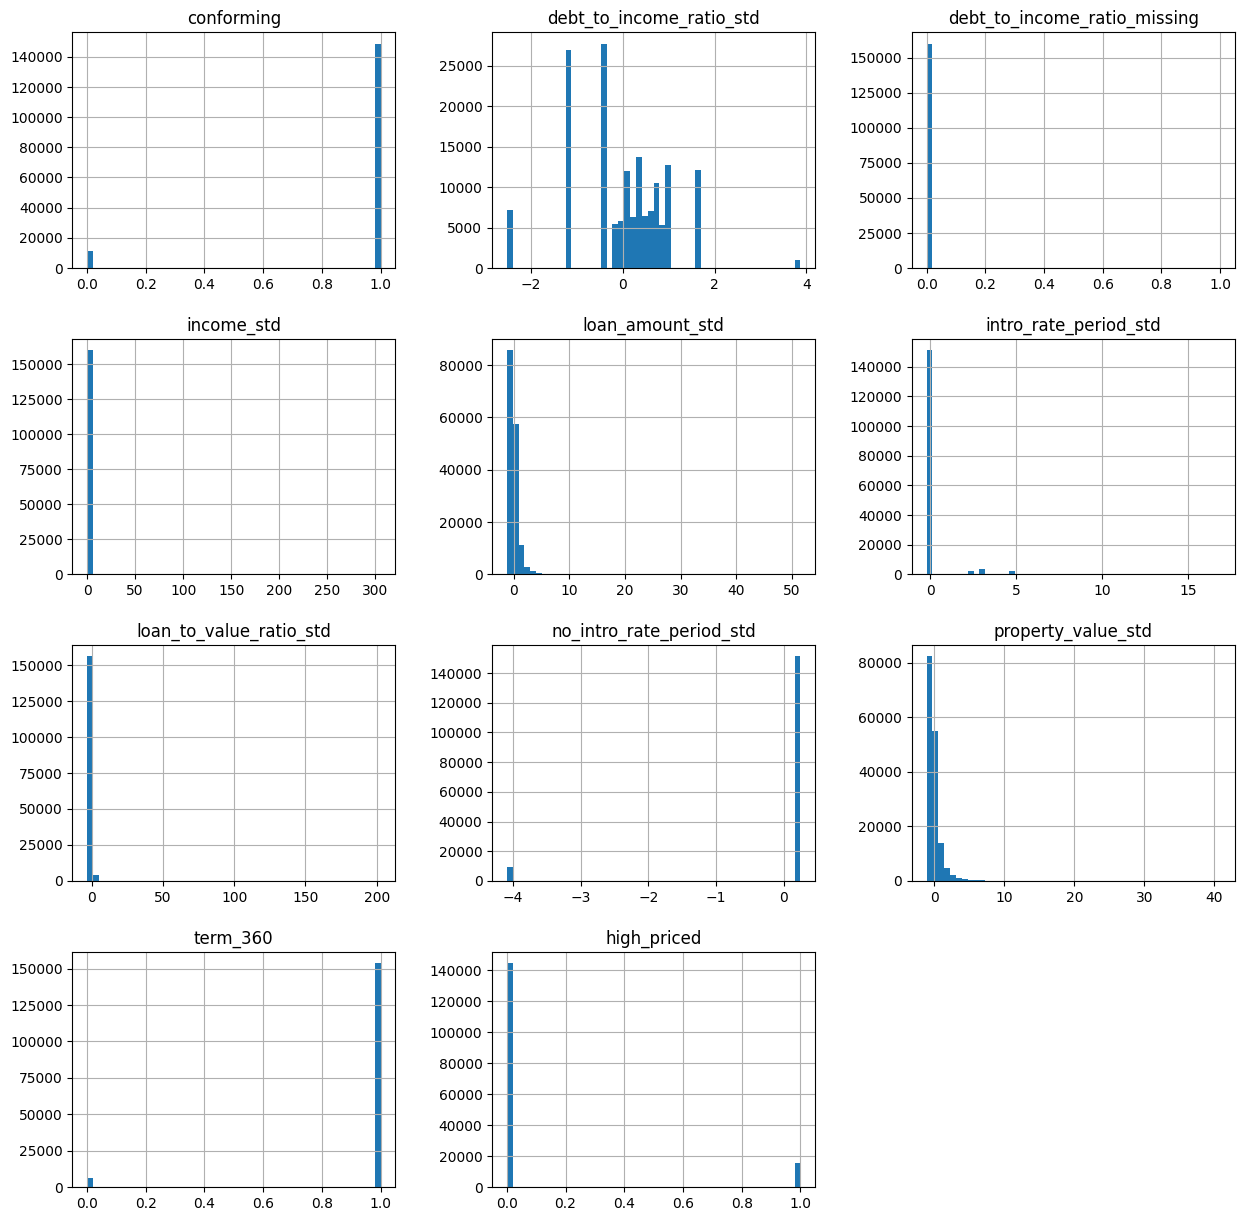

In [6]:
_ = train[x_names + [y_name]].hist(bins=50, figsize=(15, 15))

#### Correlations

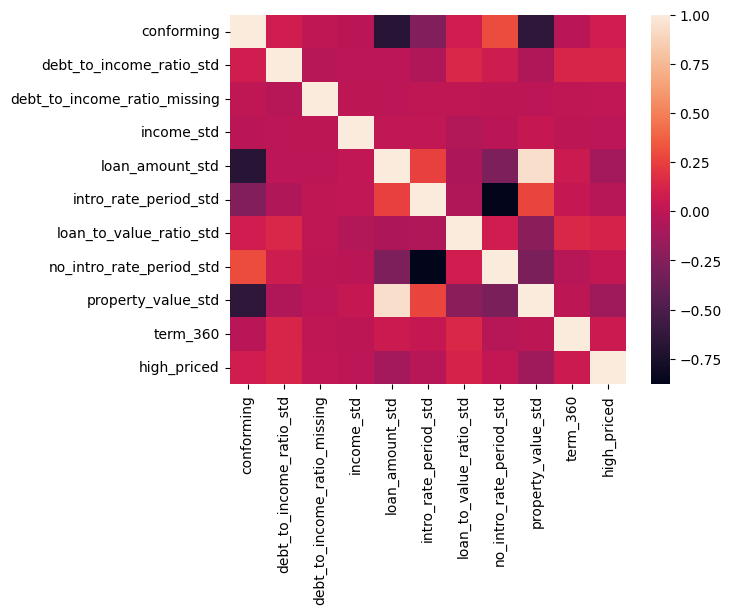

In [7]:
corr = train[x_names + [y_name]].corr()
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

## Fit interpretable models

#### Split data into train and validation partitions

In [8]:
# Step 5: Train-Validation Split
np.random.seed(SEED)
split_mask = np.random.rand(len(train)) < 0.7
train_split = train[split_mask].copy()
valid_split = train[~split_mask].copy()

### Elastic net

#### Define wrapper function for grid search

In [9]:
# Step 6: H2O GLM with Improved Alpha Grid
hf_train = h2o.H2OFrame(train_split[x_names + [y_name]])
hf_valid = h2o.H2OFrame(valid_split[x_names + [y_name]])
hf_test = h2o.H2OFrame(test[x_names])

glm_grid = H2OGridSearch(
    H2OGeneralizedLinearEstimator(family='binomial', lambda_search=True, seed=SEED),
    hyper_params={"alpha": [0.01, 0.1, 0.25, 0.5, 0.75, 0.99]}
)
glm_grid.train(x=x_names, y=y_name, training_frame=hf_train, validation_frame=hf_valid, seed=SEED)
best_glm = glm_grid.get_grid()[0]

print("GLM Validation AUC:", best_glm.auc(valid=True))
glm_preds = best_glm.predict(hf_test).as_data_frame()['p1']
pd.DataFrame({'phat': glm_preds}).to_csv('yourname_glm.csv', index=False)

/usr/local/lib/python3.11/dist-packages/h2o/grid/grid_search.py:434: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


GLM Validation AUC: 0.753829942632472


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


#### Fit elastic net with grid search

In [14]:
expanded_params = {
    'max_bins': [128, 256, 512, 1024, 2048],
    'max_interaction_bins': [16, 32, 64, 128, 256],
             'interactions': [5, 10, 15],
             'outer_bags': [4, 8, 12],
             'inner_bags': [0, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_leaves': [3, 5, 7],
    'min_samples_leaf': [2, 5, 10],
    'interactions': [5, 10, 20],
    'outer_bags': [4, 8, 16]
}

keys, values = zip(*expanded_params.items())
experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]
np.random.seed(SEED)
selected_experiments = np.random.choice(experiments, 30, replace=False)

best_score = 0
best_ebm = None
for i, params in enumerate(selected_experiments):
    print(f"Training EBM {i+1}/60 with params: {params}")
    ebm = ExplainableBoostingClassifier(random_state=SEED, **params)
    ebm.fit(train_split[x_names], train_split[y_name])

    roc = ROC(ebm.predict_proba)
    auc = roc.explain_perf(valid_split[x_names], valid_split[y_name])._internal_obj['overall']['auc']
    print("AUC:", auc)
    if auc > best_score:
        best_score = auc
        best_ebm = ebm

print("Best EBM AUC:", best_score)
ebm_preds = best_ebm.predict_proba(test[x_names])[:, 1]
pd.DataFrame({'phat': ebm_preds}).to_csv('yourname_ebm.csv', index=False)

Training EBM 1/60 with params: {'max_bins': 256, 'max_interaction_bins': 64, 'interactions': 20, 'outer_bags': 8, 'inner_bags': 4, 'learning_rate': 0.01, 'max_leaves': 3, 'min_samples_leaf': 2}


KeyboardInterrupt: 

#### Basic AUC assessment

In [13]:
# Step 8: Monotonic XGBoost with Grid Search
corr_signs = np.sign(train_split[x_names + [y_name]].corr()[y_name].values[:-1])
mono_constraints = tuple(int(i) for i in corr_signs)

xgb_params = {
    'colsample_bytree': [0.5, 0.7],
    'max_depth': [3, 5],
    'eta': [0.01, 0.1],
    'reg_alpha': [0.01, 0.1],
    'reg_lambda': [0.01, 0.1],
    'subsample': [0.7, 0.9],
    'min_child_weight': [1, 5],
    'gamma': [0.0, 0.2]
}

# Cartesian product of parameters
gs_combos = [dict(zip(xgb_params, v)) for v in itertools.product(*xgb_params.values())]
np.random.seed(SEED)
selected_combos = np.random.choice(gs_combos, 5, replace=False)

best_score = 0
best_xgb = None
dtrain = xgb.DMatrix(train_split[x_names], label=train_split[y_name])
dvalid = xgb.DMatrix(valid_split[x_names], label=valid_split[y_name])

tree_limit = 1000
for i, params in enumerate(selected_combos):
    params.update({
        'booster': 'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': NTHREAD,
        'monotone_constraints': mono_constraints,
        'seed': SEED
    })
    print(f"Training XGBoost {i+1}/5 with params: {params}")
    model = xgb.train(params, dtrain, tree_limit, evals=[(dvalid, 'eval')], early_stopping_rounds=100, verbose_eval=False)
    if model.best_score > best_score:
        best_score = model.best_score
        best_xgb = model

print("Best XGBoost AUC:", best_score)
dtest = xgb.DMatrix(test[x_names])
xgb_preds = best_xgb.predict(dtest, iteration_range=(0, best_xgb.best_iteration))
pd.DataFrame({'phat': xgb_preds}).to_csv('yourname_xgb.csv', index=False)


Training XGBoost 1/5 with params: {'colsample_bytree': 0.5, 'max_depth': 5, 'eta': 0.01, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.9, 'min_child_weight': 5, 'gamma': 0.2, 'booster': 'gbtree', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 4, 'monotone_constraints': (1, 1, 1, -1, -1, -1, 1, 1, -1, 1), 'seed': 12345}
Training XGBoost 2/5 with params: {'colsample_bytree': 0.7, 'max_depth': 3, 'eta': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9, 'min_child_weight': 5, 'gamma': 0.2, 'booster': 'gbtree', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 4, 'monotone_constraints': (1, 1, 1, -1, -1, -1, 1, 1, -1, 1), 'seed': 12345}
Training XGBoost 3/5 with params: {'colsample_bytree': 0.7, 'max_depth': 3, 'eta': 0.1, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.7, 'min_child_weight': 1, 'gamma': 0.0, 'booster': 'gbtree', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 4, 'monotone_constraints': (1, 1, 1, -1, 

#### Write submission file

In [ ]:
best_glm_submit = best_glm.predict(h2o.H2OFrame(test)).as_data_frame()
best_glm_submit.drop(['predict', 'p0'], axis=1, inplace=True)
best_glm_submit.columns = ['phat']
best_glm_submit.to_csv('ph_best_glm_' + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.csv'),
                       index=False)

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


### Monotonic XGBoost

#### Define utility function for random grid search

In [ ]:
def xgb_grid(dtrain, dvalid, mono_constraints=None, gs_params=None, n_models=None,
             ntree=None, early_stopping_rounds=None, verbose=False, seed=None):

    """ Performs a random grid search over n_models and gs_params.

    :param dtrain: Training data in LightSVM format.
    :param dvalid: Validation data in LightSVM format.
    :param mono_constraints: User-supplied monotonicity constraints.
    :param gs_params: Dictionary of lists of potential XGBoost parameters over which to search.
    :param n_models: Number of random models to evaluate.
    :param ntree: Number of trees in XGBoost model.
    :param early_stopping_rounds: XGBoost early stopping rounds.
    :param verbose: Whether to display training iterations, default False.
    :param seed: Random seed for better interpretability.
    :return: Best candidate model from random grid search.

    """

    # cartesian product of gs_params
    keys, values = zip(*gs_params.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]

    # preserve exact reproducibility for this function
    np.random.seed(SEED)

    # select randomly from cartesian product space
    selected_experiments = np.random.choice(len(experiments), n_models)

    # set global params for objective,  etc.
    params = {'booster': 'gbtree',
              'eval_metric': 'auc',
              'nthread': NTHREAD,
              'objective': 'binary:logistic',
              'seed': SEED}

    # init grid search loop
    best_candidate = None
    best_score = 0

    # grid search loop
    for i, exp in enumerate(selected_experiments):

        params.update(experiments[exp])  # override global params with current grid run params

        print('Grid search run %d/%d:' % (int(i + 1), int(n_models)))
        print('Training with parameters:', params)

        # train on current params
        watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

        if mono_constraints is not None:
            params['monotone_constraints'] = mono_constraints

        candidate = xgb.train(params,
                              dtrain,
                              ntree,
                              early_stopping_rounds=early_stopping_rounds,
                              evals=watchlist,
                              verbose_eval=verbose)

        # determine if current model is better than previous best
        if candidate.best_score > best_score:
            best_candidate = candidate
            best_score = candidate.best_score
            print('Grid search new best score discovered at iteration %d/%d: %.4f.' %
                             (int(i + 1), int(n_models), candidate.best_score))

        print('---------- ----------')

    return best_candidate

#### Fit monotonic XGBoost with random grid search

In [ ]:
# dictionary of hyperparameter value lists for grid search
gs_params = {'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
             'colsample_bylevel': [0.3, 0.5, 0.7, 0.9],
             'eta': [0.005, 0.05, 0.5],
             'max_depth': [3, 5, 7],
             'reg_alpha': [0.0005, 0.005, 0.05],
             'reg_lambda': [0.0005, 0.005, 0.05],
             'subsample': [0.3, 0.5, 0.7, 0.9],
             'min_child_weight': [1, 5, 10],
             'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4]}

# define monotonicity constraints
mono_constraints = tuple([int(i) for i in np.sign(train[x_names + [y_name]].corr()[y_name].values[:-1])])

# start local timer
mxgb_tic = time.time()

# Convert data to SVMLight format
dtrain = xgb.DMatrix(train[x_names], train[y_name])
dvalid = xgb.DMatrix(valid[x_names], valid[y_name])

# Monotonic XGBoost grid search
best_mxgb = xgb_grid(dtrain, dvalid, gs_params=gs_params, n_models=50, ntree=1000, early_stopping_rounds=100,
                     mono_constraints=mono_constraints, seed=SEED)

# end local timer
mxgb_toc = time.time() - mxgb_tic
print('Monotonic GBM training completed in %.2f s.' % (mxgb_toc))

Grid search run 1/50:
Training with parameters: {'booster': 'gbtree', 'eval_metric': 'auc', 'nthread': 4, 'objective': 'binary:logistic', 'seed': 12345, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9, 'eta': 0.5, 'max_depth': 7, 'reg_alpha': 0.0005, 'reg_lambda': 0.005, 'subsample': 0.3, 'min_child_weight': 5, 'gamma': 0.0}
Grid search new best score discovered at iteration 1/50: 0.7906.
---------- ----------
Grid search run 2/50:
Training with parameters: {'booster': 'gbtree', 'eval_metric': 'auc', 'nthread': 4, 'objective': 'binary:logistic', 'seed': 12345, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.3, 'eta': 0.05, 'max_depth': 5, 'reg_alpha': 0.0005, 'reg_lambda': 0.0005, 'subsample': 0.5, 'min_child_weight': 1, 'gamma': 0.2, 'monotone_constraints': (1, 1, 1, -1, 1, 1, -1, -1, -1, 1)}
---------- ----------
Grid search run 3/50:
Training with parameters: {'booster': 'gbtree', 'eval_metric': 'auc', 'nthread': 4, 'objective': 'binary:logistic', 'seed': 12345, 'colsample_bytree'

#### Basic AUC assessment

In [ ]:
print('Validation AUC: %.4f.' % best_mxgb.best_score)

Validation AUC: 0.7916.


#### Write submission file

In [ ]:
dtest = xgb.DMatrix(test[x_names])
best_mxgb_submit = pd.DataFrame(best_mxgb.predict(dtest, iteration_range=(0, best_mxgb.best_iteration)), columns=['phat'])
best_mxgb_submit.to_csv('ph_best_mxgb_' + str(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.csv'),
                        index=False)

### Explainable Boosting Machine

#### Define utility function for random grid search

In [ ]:
def ebm_grid(train, valid, x_names, y_name, gs_params=None, n_models=None, early_stopping_rounds=None, seed=None):

    """ Performs a random grid search over n_models and gs_params.

    :param train: Training data as Pandas DataFrame.
    :param valid: Validation data as Pandas DataFrame.
    :param x_names: Names of input features.
    :param y_name: Name of target feature.
    :param gs_params: Dictionary of lists of potential EBM parameters over which to search.
    :param n_models: Number of random models to evaluate.
    :param early_stopping_rounds: EBM early stopping rounds.
    :param seed: Random seed for better interpretability.
    :return: Best candidate model from random grid search.

    """

    # cartesian product of gs_params
    keys, values = zip(*gs_params.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]

    # preserve exact reproducibility for this function
    np.random.seed(SEED)

    # select randomly from cartesian product space
    selected_experiments = np.random.choice(len(experiments), n_models)

    # set global params for seed, etc.
    params = {'n_jobs': NTHREAD,
              'early_stopping_rounds': early_stopping_rounds,
              'random_state': SEED}

    # init grid search loop
    best_candidate = None
    best_score = 0

    # grid search loop
    for i, exp in enumerate(selected_experiments):

        params.update(experiments[exp])  # override global params with current grid run params

        print('Grid search run %d/%d:' % (int(i + 1), int(n_models)))
        print('Training with parameters:', params)

        # train
        ebm = ExplainableBoostingClassifier(**params)
        candidate = ebm.fit(train[x_names], train[y_name])

        # calculate AUC
        ebm_perf = ROC(ebm.predict_proba).explain_perf(valid[x_names], valid[y_name])
        candidate_best_score = ebm_perf._internal_obj['overall']['auc']

        # determine if current model is better than previous best
        if candidate_best_score > best_score:
            best_candidate = candidate
            best_score = candidate_best_score
            print('Grid search new best score discovered at iteration %d/%d: %.4f.' %
                             (int(i + 1), int(n_models), candidate_best_score))

        print('---------- ----------')

        del ebm

    return best_candidate

#### Fit EBM with random grid search

In [ ]:
# dictionary of hyperparameter value lists for grid search
gs_params = {'max_bins': [128, 256, 512],
             'max_interaction_bins': [16, 32, 64],
             'interactions': [5, 10, 15],
             'outer_bags': [4, 8, 12],
             'inner_bags': [0, 4],
             'learning_rate': [0.001, 0.01, 0.05],
             'validation_size': [0.1, 0.25, 0.5],
             'min_samples_leaf': [1, 2, 5, 10],
             'max_leaves': [1, 3, 5]}

# start local timer
ebm_tic = time.time()

# EBM grid search
best_ebm = ebm_grid(train, valid, x_names, y_name, gs_params=gs_params, n_models=10,
                    early_stopping_rounds=100, seed=SEED)

# end local timer
ebm_toc = time.time() - ebm_tic
print('EBM training completed in %.2f s.' % (ebm_toc))

Grid search run 1/10:
Training with parameters: {'n_jobs': 4, 'early_stopping_rounds': 100, 'random_state': 12345, 'max_bins': 512, 'max_interaction_bins': 16, 'interactions': 5, 'outer_bags': 4, 'inner_bags': 0, 'learning_rate': 0.05, 'validation_size': 0.25, 'min_samples_leaf': 1, 'max_leaves': 3}
Grid search new best score discovered at iteration 1/10: 0.8206.
---------- ----------
Grid search run 2/10:
Training with parameters: {'n_jobs': 4, 'early_stopping_rounds': 100, 'random_state': 12345, 'max_bins': 128, 'max_interaction_bins': 32, 'interactions': 5, 'outer_bags': 8, 'inner_bags': 0, 'learning_rate': 0.001, 'validation_size': 0.25, 'min_samples_leaf': 2, 'max_leaves': 5}
Grid search new best score discovered at iteration 2/10: 0.8210.
---------- ----------
Grid search run 3/10:
Training with parameters: {'n_jobs': 4, 'early_stopping_rounds': 100, 'random_state': 12345, 'max_bins': 512, 'max_interaction_bins': 16, 'interactions': 5, 'outer_bags': 4, 'inner_bags': 0, 'learning_